In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r"D:\ecommerce_churn\encoded.csv")

Modeling

### **Split train-test sets**

In [ ]:
# Separate dependent and independent variables
X = df.drop('Churn', axis=1)
y= df.Churn

Scailing


In [ ]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,random_state =100)

In [ ]:
# Checking the target rate in the population, train sample and test sample
print("Population risk rate :",
      round(sum(df_encoded.Churn)*100/len(df_encoded), 2),"%")
print("Train set risk rate :",
      round(sum(y_train)*100/len(y_train), 2),"%")
print("Test set risk rate :",
      round(sum(y_test)*100/len(y_test), 2),"%")

Population risk rate : 50.0 %
Train set risk rate : 50.24 %
Test set risk rate : 49.43 %


As you can see, the target rate in the population is 50%. The target rate in the train sample is slightly higher than the population risk rate, while the target rate in the test sample is slightly lower than the population risk rate. This is a good indication that the train and test samples are representative of the population.

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
lr=round(accuracy_score(y_test,y_pred_lr),2)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr))
print('Recall = ',recall_score(y_test,y_pred_lr))
print('f1 score =',f1_score(y_test,y_pred_lr))

Accuracy =  0.7868327402135231
precision =  0.7712912087912088
Recall =  0.80849532037437
f1 score = 0.7894551845342705


In [ ]:
y_pred_lr = logit_model.predict(X_test)

Cross-validation and parameter tuning are two important techniques used in machine learning to improve the performance of a model.

Cross-validation is a technique for evaluating the performance of a model by training it on multiple subsets of the data and testing it on the remaining subsets. This helps to ensure that the model is not overfitting to the training data and that it can generalize well to new data.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold_validator = KFold(10)

In [ ]:
for train_index,test_index in kfold_validator.split(X,y):
    print('training Index:',train_index)
    print('Testing Index',test_index)

training Index: [ 937  938  939 ... 9361 9362 9363]
Testing Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 2

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_result = cross_val_score(logit_model,X,y,cv=kfold_validator)

In [ ]:
cv_result

array([0.78335112, 0.78655283, 0.7620064 , 0.75346852, 0.70833333,
       0.71901709, 0.8034188 , 0.76175214, 0.77350427, 0.78098291])

In [ ]:
kfold_log=round(np.mean(cv_result),2)
kfold_log

0.76

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index: ',train_index)
    print('Testing Index: ',test_index)

Training Index:  [ 580  582  583 ... 9361 9362 9363]
Testing Index:  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  1

In [ ]:
skcv_result =cross_val_score(logit_model,X,y,cv=skfold_validator)

In [ ]:
skcv_result

array([0.79615795, 0.81323372, 0.79615795, 0.81216649, 0.79166667,
       0.78739316, 0.77777778, 0.75534188, 0.78205128, 0.7767094 ])

In [ ]:
skfold_log=round(np.mean(skcv_result),2)
skfold_log

0.79

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf =DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred =dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
dt=round(accuracy_score(y_test,y_pred),2)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score =',f1_score(y_test,y_pred))

Accuracy =  0.9850533807829182
precision =  0.9706498951781971
Recall =  1.0
f1 score = 0.9851063829787233


In [ ]:
cv_result1 = cross_val_score(dt_clf,X,y,cv=kfold_validator)

In [ ]:
kfold_dt=round(np.mean(cv_result1),2)
kfold_dt

1.0

In [ ]:
skcv_result1 =cross_val_score(dt_clf,X,y,cv=skfold_validator)

In [ ]:
skfold_dt=round(np.mean(cv_result1),2)
skfold_dt

1.0

In [ ]:
#SVM model
from sklearn.svm import SVC
svmclf =SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svmclf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
svm_lin=round(accuracy_score(y_test,y_pred),2)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score =',f1_score(y_test,y_pred))

Accuracy =  0.8142348754448399
precision =  0.8037841625788367
Recall =  0.8257739380849533
f1 score = 0.8146306818181817


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1141  280]
 [ 242 1147]]


In [ ]:
cv_result2 = cross_val_score(svmclf,X,y,cv=kfold_validator)

In [ ]:
kfold_svml=round(np.mean(cv_result2),2)
kfold_svml

0.79

In [ ]:
skcv_result2 =cross_val_score(svmclf,X,y,cv=skfold_validator)

In [ ]:
skfold_svml=round(np.mean(skcv_result2),2)
skfold_svml

0.81

In [ ]:
#SVM model
from sklearn.svm import SVC
svmclf =SVC(kernel='rbf')
svmclf.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svmclf.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
svm_rbf=round(accuracy_score(y_test,y_pred),2)
print('precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score =',f1_score(y_test,y_pred))

Accuracy =  0.7572953736654804
precision =  0.7194289261328367
Recall =  0.8344132469402448
f1 score = 0.7726666666666666


In [ ]:
cv_result3 = cross_val_score(svmclf,X,y,cv=kfold_validator)

In [ ]:
kfold_svmr=round(np.mean(cv_result3),2)
kfold_svmr

0.72

In [ ]:
skcv_result3=cross_val_score(svmclf,X,y,cv=skfold_validator)
skfold_svmr=round(np.mean(skcv_result3),2)
skfold_svmr

0.76

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

NameError: ignored

In [ ]:
y_pred=rf_clf.predict(X_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
rf=round(accuracy_score(y_test,y_pred),2)

print('precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score =',f1_score(y_test,y_pred))

Accuracy =  0.993594306049822
precision =  0.9872068230277186
Recall =  1.0
f1 score = 0.9935622317596567


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()
params = {
    "n_estimators": [10, 100, 1000],
    "max_depth": [2, 4, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}

gscv = GridSearchCV(rf_clf, params, scoring="accuracy")
gscv.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [ ]:
# Print the accuracy score
print(gscv.best_score_)

0.8696964615321908


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1403   18]
 [   0 1389]]


<Axes: >

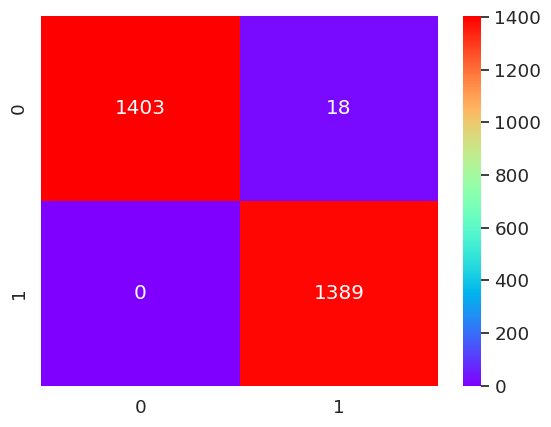

In [ ]:
cm_train_rf=confusion_matrix(y_test,y_pred)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
cv_result4 = cross_val_score(rf_clf,X,y,cv=kfold_validator)
kfold_rf=round(np.mean(cv_result4),2)
kfold_rf

1.0

In [ ]:
skcv_result4=cross_val_score(rf_clf,X,y,cv=skfold_validator)
skfold_rf=round(np.mean(skcv_result4),2)
skfold_rf

1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

k_val = np.arange(3,25)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train, y_train)
    pred  = classifier.predict(X_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

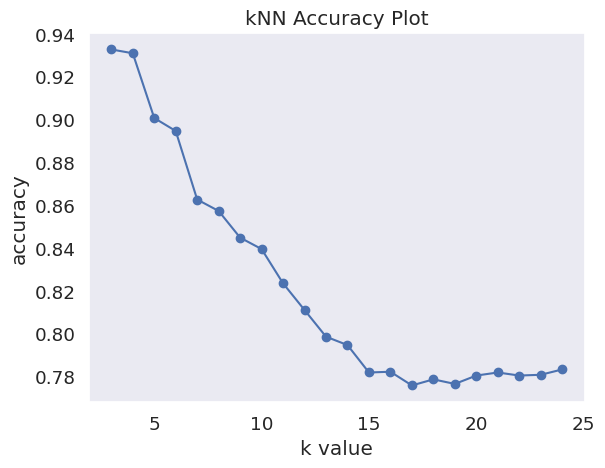

In [ ]:
plt.plot(k_val,acc_val,'o-')
plt.title('kNN Accuracy Plot')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors =2 , metric = 'minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn  = classifier.predict(X_test)

In [ ]:
score_knn=round(accuracy_score(y_test,y_pred_knn),2)

In [ ]:
print('accuracy is: ',score_knn)

accuracy is:  0.98


In [ ]:
cv_result5= cross_val_score(classifier,X,y,cv=kfold_validator)
kfold_knn=round(np.mean(cv_result5),2)
kfold_knn

1.0

In [ ]:
skcv_result5=cross_val_score(svmclf,X,y,cv=skfold_validator)
skfold_knn=round(np.mean(skcv_result5),2)
skfold_knn

0.76

In [ ]:
import xgboost as xgb
# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'max_depth': 5,                  # Maximum depth of a tree
    'learning_rate': 0.1,            # Learning rate
    'n_estimators': 100             # Number of boosting rounds
}
# Create an XGBoost DMatrix for training and testing
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
# Train the XGBoost model
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert predicted probabilities to binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

[07:11:45] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.95


In [ ]:
# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Evaluation metric
    'max_depth': 5,                  # Maximum depth of a tree
    'learning_rate': 0.1,            # Learning rate
    'n_estimators': 100             # Number of boosting rounds
}

# Create an XGBoost DMatrix for training
dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Perform k-fold cross-validation
results = xgb.cv(params=params, dtrain=dtrain, num_boost_round=100, nfold=5, metrics='logloss')

# Print the results
print(results)

[07:11:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[07:11:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[07:11:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[07:11:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[07:11:46] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

    train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0             0.643890           0.000820           0.645458          0.001027
1             0.603005           0.002037           0.605837          0.001739
2             0.568145           0.002654           0.572591          0.002468
3             0.538919           0.002962           0.544521          0.003441
4             0.513473           0.003501           0.520329          0.003465
..                 ...                ...                ...               .

In [ ]:
# Calculate the mean accuracy score
mean_accuracy = np.mean(results)

# Print the mean accuracy score
print(mean_accuracy)

train-logloss-mean    0.253171
train-logloss-std     0.003492
test-logloss-mean     0.279281
test-logloss-std      0.008009
dtype: float64


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
acc= round(metrics.accuracy_score(y_test, y_pred),2)

Gaussian Naive Bayes model accuracy(in %): 70.99644128113879


In [ ]:
cv_result7= cross_val_score(gnb,X,y,cv=kfold_validator)
kfold_gnb=round(np.mean(cv_result7),2)
kfold_gnb

0.69

In [ ]:
skcv_result7=cross_val_score(gnb,X,y,cv=skfold_validator)
skfold_gnb=round(np.mean(skcv_result7),2)
skfold_gnb

0.7

In [ ]:
results = pd.DataFrame({
    'Model': ['Logisic Regression','SVM linear kenerl','SVM  rbf ', 'kNN','Decision Tree','Random Forest','XGBoost','Gaussian Naive Bayes'],
    'Score': [lr,svm_lin,svm_rbf,score_knn,dt,rf,accuracy,acc]})

results= results.sort_values(by='Score', ascending=False)
print("Accuracy of Models")
results.head(9)

Accuracy of Models


,Model,Score
4,Decision Tree,0.990000
5,Random Forest,0.990000
3,kNN,0.980000
6,XGBoost,0.951601
1,SVM linear kenerl,0.810000
0,Logisic Regression,0.790000
2,SVM rbf,0.760000
7,Gaussian Naive Bayes,0.710000


In [ ]:
results = pd.DataFrame({
    'Model': ['Logisic Regression','SVM linear kenerl','SVM  rbf ', 'kNN','Decision Tree','Random Forest','Gaussian Naive Bayes'],
    'Score': [kfold_log,kfold_svml,kfold_svmr,kfold_knn,kfold_dt,kfold_rf,kfold_gnb]})

results= results.sort_values(by='Score', ascending=False)
print("Kfold Cross Validation Accuracy of Models")
results.head(9)

Kfold Cross Validation Accuracy of Models


,Model,Score
3,kNN,1.00
4,Decision Tree,1.00
5,Random Forest,1.00
1,SVM linear kenerl,0.79
0,Logisic Regression,0.76
2,SVM rbf,0.72
6,Gaussian Naive Bayes,0.69


In [ ]:
results = pd.DataFrame({
    'Model': ['Logisic Regression','SVM linear kenerl','SVM  rbf ', 'kNN','Decision Tree','Random Forest','Gaussian Naive Bayes'],
    'Score': [skfold_log,skfold_svml,skfold_svmr,skfold_knn,skfold_dt,skfold_rf,skfold_gnb]})

results= results.sort_values(by='Score', ascending=False)
print("Stratified Kfold Cross Validation Accuracy of Models")
results.head(9)

Stratified Kfold Cross Validation Accuracy of Models


,Model,Score
4,Decision Tree,1.00
5,Random Forest,1.00
1,SVM linear kenerl,0.81
0,Logisic Regression,0.79
2,SVM rbf,0.76
3,kNN,0.76
6,Gaussian Naive Bayes,0.70


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the hyperparameters to tune
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "max_features": ["auto", "sqrt", "log2"],
}

# Create the random forest model
model = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
# Print the accuracy score
print(grid_search.best_score_)

0.8921251186379491



Fine tuning is a technique used to improve the performance of a machine learning model by adjusting the hyperparameters of the model. Hyperparameters are the settings that control the behavior of the model, such as the number of trees in a random forest model or the learning rate of a neural network.

Fine tuning is often used after the model has been trained on a dataset. The model is then retrained on the same dataset, but with the hyperparameters adjusted. This can help to improve the performance of the model on the training dataset, as well as on new data.

There are a few different ways to fine tune a model. One way is to use a grid search. A grid search is a brute-force method that evaluates the model with different combinations of hyperparameters.

Another way to fine tune a model is to use a random search. A random search is a more efficient method that evaluates the model with randomly selected combinations of hyperparameters.

It is important to note that there is no one-size-fits-all approach to fine tuning a model. The best approach will depend on the specific model and the data that is being used.

In [ ]:
import pickle
# Create the random forest model
model =rf_clf.fit(X_train, y_train)


pickle.dump(model,open("rfmodel.pkl","wb"))